In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

['.config', 'structures', 'magnetic_shielding_tensors.csv', 'scalar_coupling_contributions.csv', 'structures.csv', '1JHN.csv', 'train.csv', 'champs-scalar-coupling.zip', 'test.csv', 'structures.zip', 'drive', 'mulliken_charges.csv', 'potential_energy.csv', 'sample_submission.csv', 'dipole_moments.csv', 'sample_data']


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/14313/473196/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1563434439&Signature=pGBRwJHtA1ip6htJUPsJZUaxcBTvTPsC4CHiTVGFp5BIWKlAVtytWgxoNCyda8mnu3rXsXKzrspGsdHuK8tsLy5lpmMjqwqaw66%2BO4oogbsxEIInLgu1BMpPbKRK7WLNT%2BA5iu3VUP2yoA%2BYay0gNhZZmAhksVLJq1SeMI%2FFyD%2BhkHzeSfThpIUAidsjY7Sf36NN5o1y5O%2BC13lBHF8cx7mHWUA%2FUJ9HF5d5A5D5azBNwpljIm06rAM3V1oO6MAu7Fzvv%2BzfIKcyQn0SV42mp0Hy5u0wvokGodfb%2B5d1E2kc2eCIaPapBSsVWgMI8UhAH62%2BhB5a71JpEaliPhTxDg%3D%3D&response-content-disposition=attachment%3B+filename%3Dchamps-scalar-coupling.zip" -O "champs-scalar-coupling.zip" -c

--2019-07-17 04:09:10--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/14313/473196/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1563434439&Signature=pGBRwJHtA1ip6htJUPsJZUaxcBTvTPsC4CHiTVGFp5BIWKlAVtytWgxoNCyda8mnu3rXsXKzrspGsdHuK8tsLy5lpmMjqwqaw66%2BO4oogbsxEIInLgu1BMpPbKRK7WLNT%2BA5iu3VUP2yoA%2BYay0gNhZZmAhksVLJq1SeMI%2FFyD%2BhkHzeSfThpIUAidsjY7Sf36NN5o1y5O%2BC13lBHF8cx7mHWUA%2FUJ9HF5d5A5D5azBNwpljIm06rAM3V1oO6MAu7Fzvv%2BzfIKcyQn0SV42mp0Hy5u0wvokGodfb%2B5d1E2kc2eCIaPapBSsVWgMI8UhAH62%2BhB5a71JpEaliPhTxDg%3D%3D&response-content-disposition=attachment%3B+filename%3Dchamps-scalar-coupling.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327001271 (312M) [application/zip]
Saving to: ‘champs-scalar-coupling.zip’

champs-scalar-coupl 100

In [ ]:
%ls

1JHN.csv                        sample_submission.csv
champs-scalar-coupling.zip      scalar_coupling_contributions.csv
dipole_moments.csv              structures/
drive/                          structures.csv
magnetic_shielding_tensors.csv  structures.zip
mulliken_charges.csv            test.csv
potential_energy.csv            train.csv
sample_data/


In [ ]:
import zipfile
from google.colab import drive



zip_ref = zipfile.ZipFile("champs-scalar-coupling.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
%mkdir structures

In [ ]:
import zipfile
from google.colab import drive


zip_ref = zipfile.ZipFile("structures.zip", 'r')
zip_ref.extractall('structures/')
zip_ref.close()

In [ ]:
scc = pd.read_csv("scalar_coupling_contributions.csv")
scc.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [ ]:
fc = scc["fc"]

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [ ]:
train_data["fc"] = scc['fc']
train_data["sd"] = scc['sd']
train_data["pso"] = scc['pso']
train_data["dso"] = scc['dso']
train_data.isna().any().any()

False

In [ ]:
train_data.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,83.0224,0.254579,1.25862,0.272010
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,-11.0347,0.352978,2.85839,-3.433600
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,-11.0325,0.352944,2.85852,-3.433870
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,-11.0319,0.352934,2.85855,-3.433930
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,83.0222,0.254585,1.25861,0.272013


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


test = pd.read_csv('test.csv')


In [ ]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [ ]:
def read_xyz(path, filename):
    return pd.read_csv(path+filename, skiprows = 2, header = None, sep = ' ', usecols=[0,1,2,3], names=['atom', 'x', 'y', 'z'])

path = 'structures/'
filename = 'dsgdb9nsd_000001.xyz'

read_xyz(path, filename)

,atom,x,y,z
0,C,-0.012698,1.085804,0.008001
1,H,0.002150,-0.006031,0.001976
2,H,1.011731,1.463751,0.000277
3,H,-0.540815,1.447527,-0.876644
4,H,-0.523814,1.437933,0.906397


7801.1437430381775
x max: 9.3822404376 x min : -9.234888942000001
y max: 10.1819566786 y min : -9.9339377177
z max: 7.8947328963 z min : -9.1347647874


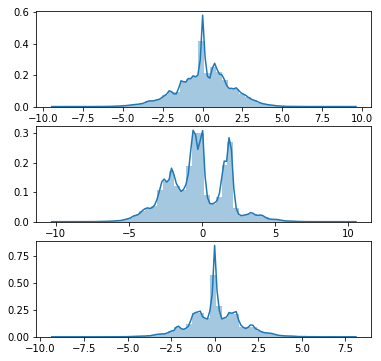

In [ ]:
import numpy as np
import pandas as pd
import os
import time

start = time.time()

path = 'structures/'

x_list = []
y_list = []
z_list = []


for filename in os.listdir('structures'):
	
		a = pd.read_csv(path+filename, skiprows = 2, header = None, sep = ' ', usecols=[0,1,2,3], names=['atom', 'x', 'y', 'z'])
		x_list = x_list + list(a['x'])
		y_list = y_list + list(a['y'])
		z_list = z_list + list(a['z'])
	
end = time.time()
print(end - start)

dimfig, dimaxes = plt.subplots(3, 1, figsize = (6, 6))
sns.distplot(x_list, ax=dimaxes[0])
sns.distplot(y_list, ax=dimaxes[1])
sns.distplot(z_list, ax=dimaxes[2])
print("x max: " + str(np.max(x_list)) + " x min : " + str(np.min(x_list)))
print("y max: " + str(np.max(y_list)) + " y min : " + str(np.min(y_list)))
print("z max: " + str(np.max(z_list)) + " z min : " + str(np.min(z_list)))

In [ ]:
xyz_data = pd.DataFrame(np.column_stack([x_list, y_list, z_list]), 
                               columns=['x_list', 'y_list', 'z_list'])


TypeError: ignored

In [ ]:

xyz_data.isna().any().any()

False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd ..

/content


In [ ]:
cd drive/My Drive/Colab Notebooks/

 Aadhar.pdf
'AAIC NOTES.zip'
 AAIC-Win-V1.1.zip
'ACE 2017 TEST SERIES'/
 Assignments_AFR_2018/
 Barrons-333-High-Freq-Words-With-Meanings.pdf
 BIRTH.pdf
 Books/
 CDS.html
'CIFAR_10 (1).ipynb'
 CIFAR_10.ipynb
 Classroom/
'Colab Notebooks'/
 ComputerVision/
 Cracking_the_Coding_Interview_6th_Editio.pdf
 cs/
 data/
'Data Dictionary.gsheet'
 Data_Notebooks/
 DT20142536400_OL.pdf
 en_example_model.zip
 FeEasy_chatbot/
'FeEasy - Flow.gdoc'
'FEEL (1).gsheet'
 FEEL.gsheet
'Fluid Mechanics.gsheet'
 FM.pdf
 freud_civilization_and_its_discontents.mobi
 FullSizeRender.jpg
 G171E32ApplicationForm.pdf
'GATE - 2018 __ Welcome.pdf'
'GATEFORUM 2017 TEST SERIES'/
'GATE_Mathematics_Questions_All_Branch_By_S_K_Mondal (2).zip'
 google.csv
 GOT/
'Green Opera'/
'GRE- Verbal prep'/
 grid_20160316_360_1.pdf
 GVResume12.gdoc
 GVResume1.gdoc
 gvresume.docx
 GV_SAI/
'Higher Engineering Mathematics - BS Grewal .pdf'
'How a Machine Learning project is approached .gdoc'
 HumanActivityRecognition.zip
'if again persis

In [ ]:
xyz_data = pd.read_csv('drive/My Drive/Colab Notebooks/xyz_data.csv')
xyz_data.head()

,Unnamed: 0,x_list,y_list,z_list
0,0,0.035440,1.391516,-0.052095
1,1,-0.041003,0.001564,-0.011802
2,2,-0.478815,-0.719704,1.255149
3,3,-1.052670,0.022839,2.292997
4,4,-2.177714,0.740500,1.790888


In [ ]:
coupling_types = set(train_data['type'])
print(coupling_types)

{'3JHH', '1JHC', '3JHC', '1JHN', '3JHN', '2JHH', '2JHN', '2JHC'}


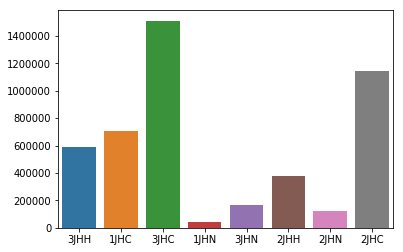

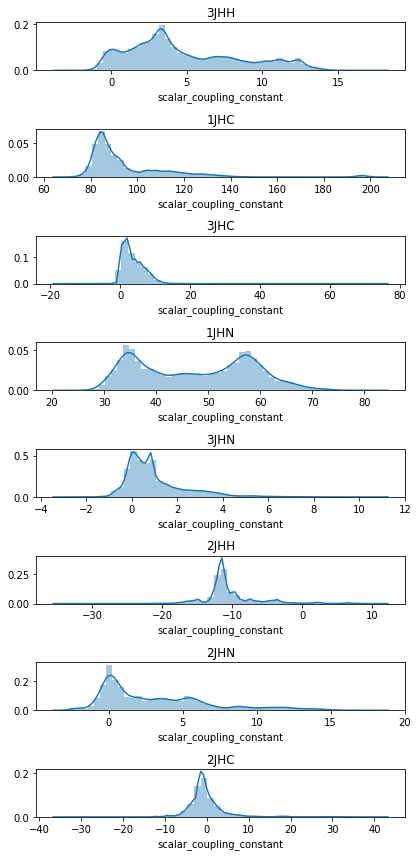

In [ ]:
coupling_types = list(coupling_types)
totals = [np.sum(train_data['type'] == x) for x in coupling_types]

subsets = dict()
for x in coupling_types:
    subsets[x] = train_data.loc[train_data['type'] == x]

bar_fig, bar_axis = plt.subplots()

sns.barplot(coupling_types, totals, ax = bar_axis)

dist_fig, dist_axes = plt.subplots(len(subsets), 1, figsize = (6, 12))

for (x, y) in zip(dist_axes, coupling_types):
    sns.distplot(subsets[y]['scalar_coupling_constant'], ax=x)
    x.set_title(y)

dist_fig.tight_layout()

In [ ]:
ls

champs-scalar-coupling.zip      sample_submission.csv
dipole_moments.csv              scalar_coupling_contributions.csv
drive/                          structures/
magnetic_shielding_tensors.csv  structures.csv
mulliken_charges.csv            structures.zip
potential_energy.csv            test.csv
sample_data/                    train.csv


In [ ]:
def length(data, index1, index2):
    """Takes an xyz file imported by read_xyz and calculates the distance between two points"""
    return np.sqrt(np.sum(np.square(data[['x', 'y', 'z']].loc[index1]-data[['x', 'y', 'z']].loc[index2])))

def neighbours(data, index):
    """Takes an xyz file imported by read_xyz and calculates the number of neighbours within sqrt(3) Å of the indexed atom"""
    l2 = np.array([np.sum(np.square(data[['x', 'y', 'z']].loc[index]-data[['x', 'y', 'z']].loc[x])) for x in range(len(data))])
    return np.sum(l2 < 3) - 1

def nearest(data, index):
    """Takes an xyz file imported by read_xyz and finds the index of the nearest atom"""
    #data['index'] = data.index
    point = data.loc[index][['x', 'y', 'z']]
    data = data[data['atom'] != 'H'][['x', 'y', 'z']]
    data[['x', 'y', 'z']] = data[['x', 'y', 'z']] - point
    data[['x', 'y', 'z']] = np.square(data[['x', 'y', 'z']])
    data = np.sum(data, axis = 1)
    if index in data.index: data[index] = 999
    return np.argmin(data)

def magnitude(vector):
    """Calculates the magnitude of a vector"""
    return np.sqrt(np.sum(np.square(vector)))
    
def dihedral(point1, point2, point3, point4):
    """Calculates the dihederal angle between two bonds"""
    b1 = point1-point2
    b2 = point2-point3
    b3 = point3-point4
    n1 = np.cross(b1, b2)
    
    if n1 == 0:
        return np.arctan2(0)
    else:
        n1 = n1/magnitude(n1)
    n2 = np.cross(b2, b3)
    
    if n2 == 0:
        return np.arctan2(0)
    else:
        n2 = n2/magnitude(n2)
        
    m1 = np.cross(n1, b2/magnitude(b2))
    
    x = np.dot(n1, n2)
    y = np.dot(m1, n2)
    
    #n1 = n1/magnitude(n1)
    #n2 = np.cross(b2, b3)
    #n2 = n2/magnitude(n2)
    #m1 = np.cross(n1, b2/magnitude(b2))
    #x = np.dot(n1, n2)
    #y = np.dot(m1, n2)
    return np.arctan2(x, y)

In [ ]:
#def singl_bond(coupling_type):    
#    feature_list = []
#    
#    for x in range(1000):#len(subsets[coupling_type])):
#        current = subsets[coupling_type].iloc[x]
#        index0 = current['atom_index_0']
#        index1 = current['atom_index_1']
#        filename = current['molecule_name'] + '.xyz'
#        data = read_xyz(path, filename)
#        feature_list.append((length(data, index0, index1), neighbours(data, index1), current['scalar_coupling_constant']))
#    
#    return pd.DataFrame(feature_list, columns = ['length', 'hybrid', 'coupling'])


In [ ]:
data_1jhn = engineered
data_1jhn.shape

(43363, 10)

In [ ]:
scc_1jhn = scc[scc['type']=='1JHN']
scc_1jhn.shape

(43363, 8)

In [ ]:
scc_1jhn.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
10,dsgdb9nsd_000002,1,0,1JHN,30.6116,0.059952,1.94935,0.067923
13,dsgdb9nsd_000002,2,0,1JHN,30.6119,0.059961,1.94935,0.067922
15,dsgdb9nsd_000002,3,0,1JHN,30.6135,0.059939,1.94911,0.067931
97,dsgdb9nsd_000012,3,0,1JHN,53.6945,0.143624,1.48139,0.205708
101,dsgdb9nsd_000012,4,0,1JHN,52.7562,0.175517,1.60638,0.197831


In [ ]:
#scc[scc['type']=='1JHN'].head()
data_1jhn['sd'] = scc['sd']
data_1jhn['pso'] = scc['pso']
data_1jhn['dso'] = scc['dso']
data_1jhn.head()

,length,hybrid,DP_X,DP_Y,DP_Z,fc,coupling,sd,pso,dso
0,1.017190,3,-0.0002,0.0000,1.6256,30.6116,32.6889,0.254579,1.25862,0.272010
1,1.017187,3,-0.0002,0.0000,1.6256,30.6119,32.6891,0.352978,2.85839,-3.433600
2,1.017208,3,-0.0002,0.0000,1.6256,30.6135,32.6905,0.352944,2.85852,-3.433870
3,1.007511,3,-3.6612,0.7058,0.0009,53.6945,55.5252,0.352934,2.85855,-3.433930
4,1.004933,3,-3.6612,0.7058,0.0009,52.7562,54.7359,0.254585,1.25861,0.272013


In [ ]:
data_1jhn.isna().any().any()

False

In [ ]:
#function_dict = {'1': single_bond, '2': two_bond, '3': three_bond}
#engineered = {x:function_dict[x[0]](x) for x in coupling_types}

C:\Users\citrix\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\Users\citrix\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
#current = subsets['3JHC']
#current.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
58,58,dsgdb9nsd_000009,3,2,3JHC,4.55166
63,63,dsgdb9nsd_000009,4,2,3JHC,4.55410
67,67,dsgdb9nsd_000009,5,2,3JHC,4.55341
68,68,dsgdb9nsd_000009,6,0,3JHC,2.51865
108,108,dsgdb9nsd_000013,3,2,3JHC,2.51277


In [ ]:
#dipole_moment = pd.read_csv("dipole_moments.csv")
#dMoment_xyz = dipole_moment[dipole_moment['molecule_name']==current['molecule_name']]
#feature_list = []
#feature_list.append([dMoment_xyz['X'], dMoment_xyz['Y'],dMoment_xyz['Z'],current['scalar_coupling_constant']])
#ss = pd.DataFrame(feature_list, columns = ['X','Y','Z','coupling'])

In [ ]:
subsets['2JHN'].shape[0]

119253

In [ ]:
subsets['1JHN'].head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc
10,10,dsgdb9nsd_000002,1,0,1JHN,32.6889,30.6116
13,13,dsgdb9nsd_000002,2,0,1JHN,32.6891,30.6119
15,15,dsgdb9nsd_000002,3,0,1JHN,32.6905,30.6135
97,97,dsgdb9nsd_000012,3,0,1JHN,55.5252,53.6945
101,101,dsgdb9nsd_000012,4,0,1JHN,54.7359,52.7562


In [ ]:
import sys
import pandas as pd
from time import sleep
from tqdm import tqdm
path = 'structures/'
def single_bond(coupling_type):    
    feature_list = []
    dipole_moment = pd.read_csv("dipole_moments.csv")
    for index, row in subsets[coupling_type].iterrows():
        current = row
        index0 = current['atom_index_0']
        index1 = current['atom_index_1']
        filename = current['molecule_name'] + '.xyz'
        dMoment_xyz = dipole_moment[dipole_moment['molecule_name'] == current['molecule_name']]
        #data = read_xyz(path, current['molecule_name'] + '.xyz')
        data = pd.read_csv(path+filename, skiprows = 2, header = None, sep = ' ', usecols=[0,1,2,3], names=['atom', 'x', 'y', 'z'])
        feature_list.append((length(data, index0, index1), neighbours(data, index1), dMoment_xyz.get_values()[0][1], dMoment_xyz.get_values()[0][2], dMoment_xyz.get_values()[0][3], current['fc'],current['scalar_coupling_constant']))
    
    return pd.DataFrame(feature_list, columns = ['length','hybrid','DP_X','DP_Y','DP_Z','fc','coupling'])

def two_bond(coupling_type):
    feature_list = []
    dipole_moment = pd.read_csv("dipole_moments.csv")
    with tqdm(total=(subsets[coupling_type].shape[0]), file=sys.stdout) as pbar:
      i=0
      for index, row in (subsets[coupling_type].iterrows()):
          current = row
          #data = read_xyz(path, current['molecule_name'] + '.xyz')
          filename = current['molecule_name'] + '.xyz'
          data = pd.read_csv(path+filename, skiprows = 2, header = None, sep = ' ', usecols=[0,1,2,3], names=['atom', 'x', 'y', 'z'])
          dMoment_xyz = dipole_moment[dipole_moment['molecule_name'] == current['molecule_name']]
          index_0 = current['atom_index_0']
          index_1 = current['atom_index_1']
          shared = nearest(data, index_0)
          length1 = length(data, index_0, shared)
          length2 = length(data, index_1, shared)
          vector1 = data[['x', 'y', 'z']].loc[index_0]-data[['x', 'y', 'z']].loc[shared]
          vector2 = data[['x', 'y', 'z']].loc[index_1]-data[['x', 'y', 'z']].loc[shared]
          cosine = np.dot(vector1, vector2)/(length1 * length2)
          shared_hybrid = neighbours(data, shared)
          carbon_hybrid = neighbours(data, index_1)
          feature_list.append((length1, length2, cosine, data['atom'].iloc[shared], shared_hybrid, carbon_hybrid,dMoment_xyz.get_values()[0][1], dMoment_xyz.get_values()[0][2], dMoment_xyz.get_values()[0][3] ,current['sd'],current['pso'],current['dso'],current['fc'],current['scalar_coupling_constant']))
          pbar.set_description('processed: %d' % (1 + i))
          pbar.update(1)
          #sleep(1)
          i=i+1
    return pd.DataFrame(feature_list, columns = ['length1', 'length2', 'cosine', 'atom', 'hybrid1', 'hybrid2','DP_X' , 'DP_Y' , 'DP_Z' ,'sd','pso','dso','fc','coupling'])

def three_bond(coupling_type):
    feature_list = []
    dipole_moment = pd.read_csv("dipole_moments.csv")
    for index, row in subsets[coupling_type].iterrows():
        current = row
        #data = read_xyz(path, current['molecule_name'] + '.xyz')
        filename = current['molecule_name'] + '.xyz'
        data = pd.read_csv(path+filename, skiprows = 2, header = None, sep = ' ', usecols=[0,1,2,3], names=['atom', 'x', 'y', 'z'])
        index_0 = current['atom_index_0']
        index_1 = current['atom_index_1']
        dMoment_xyz = dipole_moment[dipole_moment['molecule_name'] == current['molecule_name']]
        #print(type(dMoment_xyz['molecule_name']))
        #print(type(current['molecule_name']))
        shared1 = nearest(data, index_0)
        shared2 = nearest(data, index_1)
        length1 = length(data, index_0, shared1)
        length2 = length(data, index_1, shared2)
        length_shared = length(data, index_0, index_1)
        cosine = dihedral(data[['x', 'y', 'z']].loc[index_0], data[['x', 'y', 'z']].loc[shared1], data[['x', 'y', 'z']].loc[shared2], data[['x', 'y', 'z']].loc[index_1])
        shared1_hybrid = neighbours(data, shared1)
        shared2_hybrid = neighbours(data, shared2)
        terminal_hybrid = neighbours(data, index_1)
        feature_list.append((length1, length2, length_shared, cosine, data['atom'].iloc[shared1], data['atom'].iloc[shared2], shared1_hybrid, shared2_hybrid, terminal_hybrid, dMoment_xyz.get_values()[0][1], dMoment_xyz.get_values()[0][2], dMoment_xyz.get_values()[0][3], current['sd'],current['pso'],current['dso'],current['fc'],current['scalar_coupling_constant']))
    return pd.DataFrame(feature_list, columns = ['length1','length2','length_shared','angle', 'atom1', 'atom2', 'hybrid1', 'hybrid2', 'terminal_hybrid', 'DP_X' , 'DP_Y' , 'DP_Z' ,'sd','pso','dso','fc','coupling'])

#function_dict = {'1': single_bond, '2': two_bond, '3': three_bond}
#engineered = {x:function_dict[x[0]](x) for x in coupling_types}

In [ ]:
#import sys
#from time import sleep
#from tqdm import tqdm
#a= 0
#with tqdm(total=(subsets['1JHN'].shape[0]), file=sys.stdout) as pbar:
#    for index, row in (subsets['1JHN'].iterrows()):
#        pbar.set_description('processed: %d' % (1 + index))
#        pbar.update(1)
#        #sleep(1)
#        #print('1')
#        a=1

In [ ]:
subsets['2JHN'].shape

(119253, 10)

In [ ]:
N%%time
engineered = two_bond('2JHN')

processed: 2:   0%|          | 2/119253 [00:00<6:47:28,  4.88it/s]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


processed: 36598:  31%|███       | 36597/119253 [2:25:07<5:34:34,  4.12it/s]Buffered data was truncated after reaching the output size limit.

In [ ]:
engineered.head()

,length,hybrid,DP_X,DP_Y,DP_Z,fc,coupling
0,1.017190,3,-0.0002,0.0000,1.6256,30.6116,32.6889
1,1.017187,3,-0.0002,0.0000,1.6256,30.6119,32.6891
2,1.017208,3,-0.0002,0.0000,1.6256,30.6135,32.6905
3,1.007511,3,-3.6612,0.7058,0.0009,53.6945,55.5252
4,1.004933,3,-3.6612,0.7058,0.0009,52.7562,54.7359


In [ ]:
engineered.isna().any().any()

False

In [ ]:
from google.colab import files
if (engineered.isna().any().any()) is not True: 
  engineered.to_csv('1JHN.csv')
  files.download('1JHN.csv')

In [ ]:
from google.colab import files
xyz_data = pd.DataFrame(np.column_stack([x_list, y_list, z_list]), 
                               columns=['x_list', 'y_list', 'z_list'])
if (xyz_data.isna().any().any()) is not True: 
  xyz_data.to_csv('xyz_data.csv')
  files.download('xyz_data.csv')

(2358657, 3)

engineered.head()

In [ ]:
engine.isnan()

,length1,length2,length_shared,angle,atom1,atom2,hybrid1,hybrid2,terminal_hybrid,coupling
0,1.093317,1.155009,3.162537,1.310467,C,C,4,2,1,0.880802
1,1.093319,1.155009,3.162662,-0.783857,C,C,4,2,1,0.880957
2,1.093306,1.155009,3.162564,-2.878264,C,C,4,2,1,0.880871
3,1.094009,1.369356,2.627629,0.883494,C,C,4,3,3,-0.052074
4,1.089656,1.369356,3.318123,-1.238283,C,C,4,3,3,1.611320


In [ ]:
Y_3jhn = engine['coupling']
data_3jhn = engine.drop('coupling',axis = 1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3jhn, Y_3jhn, test_size=0.25, random_state=42)

In [ ]:
X_train.head()

,length1,length2,length_shared,angle,atom1,atom2,hybrid1,hybrid2,terminal_hybrid
4901,1.014807,1.372296,3.083931,-2.745421,N,C,3,3,3
4375,1.090575,1.368615,3.366978,-1.568821,C,C,4,3,3
6698,1.006599,1.302947,3.193385,-1.570634,N,C,3,3,2
9805,1.092999,1.544605,3.220385,-1.571050,C,C,4,4,3
1101,1.096449,1.471152,2.797452,2.643216,C,C,4,4,3


In [ ]:
y_train.head()

4901    1.166750
4375    3.648860
6698   -1.058810
9805    3.733810
1101    0.217412
Name: coupling, dtype: float64

In [ ]:
cate_features_train = pd.get_dummies(X_train, columns=['atom1'], prefix = ['atom1'])
cate_features_train = pd.get_dummies(cate_features_train, columns=['atom2'], prefix = ['atom2'])
cate_features_train.head()


,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N,atom2_O
4901,1.014807,1.372296,3.083931,-2.745421,3,3,3,0,1,0,1,0,0
4375,1.090575,1.368615,3.366978,-1.568821,4,3,3,1,0,0,1,0,0
6698,1.006599,1.302947,3.193385,-1.570634,3,3,2,0,1,0,1,0,0
9805,1.092999,1.544605,3.220385,-1.571050,4,4,3,1,0,0,1,0,0
1101,1.096449,1.471152,2.797452,2.643216,4,4,3,1,0,0,1,0,0


In [ ]:
data_2jhn = subsets['2JHN']

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = engineered[['fc','coupling']].corr()
print('1JHN')
corr.style.background_gradient(cmap='coolwarm')

1JHN


,fc,coupling
fc,1,0.999744
coupling,0.999744,1


In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = data_2jhn[['fc','scalar_coupling_constant']].corr()
print('2JHN')
corr.style.background_gradient(cmap='coolwarm')

2JHN


,fc,scalar_coupling_constant
fc,1,0.998338
scalar_coupling_constant,0.998338,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['3JHN']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('3JHN')
corr.style.background_gradient(cmap='coolwarm')

3JHN


,fc,scalar_coupling_constant
fc,1,0.997081
scalar_coupling_constant,0.997081,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['2JHC']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('2JHC')
corr.style.background_gradient(cmap='coolwarm')

2JHC


,fc,scalar_coupling_constant
fc,1,0.991861
scalar_coupling_constant,0.991861,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['1JHC']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('1JHC')
corr.style.background_gradient(cmap='coolwarm')

1JHC


,fc,scalar_coupling_constant
fc,1,0.999868
scalar_coupling_constant,0.999868,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['3JHC']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('3JHC')
corr.style.background_gradient(cmap='coolwarm')

3JHC


,fc,scalar_coupling_constant
fc,1,0.999438
scalar_coupling_constant,0.999438,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['2JHH']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('2JHH')
corr.style.background_gradient(cmap='coolwarm')

2JHH


,fc,scalar_coupling_constant
fc,1,0.999586
scalar_coupling_constant,0.999586,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['1JHN']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('1JHN')
corr.style.background_gradient(cmap='coolwarm')

1JHN


,fc,scalar_coupling_constant
fc,1,0.999744
scalar_coupling_constant,0.999744,1


In [ ]:
import pandas as pd
import numpy as np
data_3jhn = subsets['3JHH']
rs = np.random.RandomState(0)
corr = data_3jhn[['fc','scalar_coupling_constant']].corr()
print('3JHH')
corr.style.background_gradient(cmap='coolwarm')

3JHH


,fc,scalar_coupling_constant
fc,1,0.995009
scalar_coupling_constant,0.995009,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(cate_features_train,y_train)


In [ ]:
engineered.head()

,length,hybrid,DP_X,DP_Y,DP_Z,fc,coupling
0,1.017190,3,-0.0002,0.0000,1.6256,30.6116,32.6889
1,1.017187,3,-0.0002,0.0000,1.6256,30.6119,32.6891
2,1.017208,3,-0.0002,0.0000,1.6256,30.6135,32.6905
3,1.007511,3,-3.6612,0.7058,0.0009,53.6945,55.5252
4,1.004933,3,-3.6612,0.7058,0.0009,52.7562,54.7359


In [ ]:
data_1jhn.head()

,length,hybrid,DP_X,DP_Y,DP_Z,fc,coupling,sd,pso,dso
0,1.017190,3,-0.0002,0.0000,1.6256,30.6116,32.6889,0.254579,1.25862,0.272010
1,1.017187,3,-0.0002,0.0000,1.6256,30.6119,32.6891,0.352978,2.85839,-3.433600
2,1.017208,3,-0.0002,0.0000,1.6256,30.6135,32.6905,0.352944,2.85852,-3.433870
3,1.007511,3,-3.6612,0.7058,0.0009,53.6945,55.5252,0.352934,2.85855,-3.433930
4,1.004933,3,-3.6612,0.7058,0.0009,52.7562,54.7359,0.254585,1.25861,0.272013


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1jhn[['length','fc','hybrid','DP_Y','DP_X','DP_Z']], data_1jhn['coupling'], test_size=0.25, random_state=42)

In [ ]:
#sample_leaf_options = [1,5,10,20,30,40,50]
#for leaf_size in sample_leaf_options :
#    model = RandomForestRegressor(n_estimators = 500, n_jobs = -1,random_state = 50,
#                                  max_features = "auto", min_samples_leaf = leaf_size)
#    model.fit(X_train,y_train)
#    print (mean_absolute_error(y_test,model.predict(X_test)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1,random_state = 50,
                            max_features = "auto", min_samples_leaf = 1)
model.fit(X_train,y_train)
print (mean_absolute_error(y_test,model.predict(X_test)))

0.09511182055923166


In [ ]:
print (mean_absolute_error(y_train,model.predict(X_train)))

0.036166533628959656


In [ ]:
cate_features_test = pd.get_dummies(X_test, columns=['atom1'], prefix = ['atom1'])
cate_features_test = pd.get_dummies(cate_features_test, columns=['atom2'], prefix = ['atom2'])
cate_features_test.head()

,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N
1801,1.095714,1.456712,3.364434,-1.434261,4,4,3,1,0,0,1,0
1190,1.095299,1.487841,2.903557,1.495433,4,4,3,1,0,0,1,0
1817,1.092303,1.364228,3.185271,-2.848431,4,3,3,1,0,0,1,0
251,1.091646,1.371761,3.265771,-2.748405,4,3,3,1,0,0,1,0
2505,1.094644,1.460865,2.826725,0.945011,4,4,3,1,0,0,1,0


In [ ]:
y_predict = reg.predict(cate_features_test)
mean_absolute_error(y_test, y_predict)

0.8781709570406583

In [ ]:
engine.head()

,length1,length2,length_shared,angle,atom1,atom2,hybrid1,hybrid2,terminal_hybrid,coupling
0,1.093317,1.155009,3.162537,1.310467,C,C,4,2,1,0.880802
1,1.093319,1.155009,3.162662,-0.783857,C,C,4,2,1,0.880957
2,1.093306,1.155009,3.162564,-2.878264,C,C,4,2,1,0.880871
3,1.094009,1.369356,2.627629,0.883494,C,C,4,3,3,-0.052074
4,1.089656,1.369356,3.318123,-1.238283,C,C,4,3,3,1.611320


In [ ]:
d = {"x":x_list,"y":y_list}
data = pd.DataFrame(data=d)
data.head()

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [ ]:
cate_features_train = pd.get_dummies(engineered, columns=['atom1'], prefix = ['atom1'])
cate_features_train = pd.get_dummies(cate_features_train, columns=['atom2'], prefix = ['atom2'])
cate_features_train.head()

,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,DP_X,DP_Y,DP_Z,coupling,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N,atom2_O
0,1.093317,1.155009,3.162537,1.310467,4,2,1,3.8266,0.000,-0.0001,0.880802,1,0,0,1,0,0
1,1.093319,1.155009,3.162662,-0.783857,4,2,1,3.8266,0.000,-0.0001,0.880957,1,0,0,1,0,0
2,1.093306,1.155009,3.162564,-2.878264,4,2,1,3.8266,0.000,-0.0001,0.880871,1,0,0,1,0,0
3,1.094009,1.369356,2.627629,0.883494,4,3,3,0.1916,-3.615,0.3468,-0.052074,1,0,0,1,0,0
4,1.089656,1.369356,3.318123,-1.238283,4,3,3,0.1916,-3.615,0.3468,1.611320,1,0,0,1,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(cate_features_train, test_size=0.25)

In [ ]:
train.head()

,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,DP_X,DP_Y,DP_Z,coupling,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N,atom2_O
2208,1.099041,1.454750,2.656799,2.272123,4,4,3,-4.4740,1.9055,0.3153,1.153890,1,0,0,1,0,0
3537,1.005780,1.319130,2.450772,1.699041,3,2,2,1.0260,2.1191,0.5053,-0.249045,0,1,0,0,1,0
4048,1.098871,1.277902,2.945648,0.085994,4,3,2,-0.3388,-1.8637,-0.6000,1.260550,1,0,0,1,0,0
4660,1.005580,1.335691,3.193965,-1.169294,3,3,2,0.5463,-1.2442,0.6327,3.662130,0,1,0,1,0,0
4571,1.094616,1.337245,2.734746,2.525560,4,3,2,0.0002,-0.7892,0.0001,0.794659,1,0,0,1,0,0


In [ ]:
engineered['atom2'].value_counts()

KeyError: ignored

In [ ]:
x_train = []
for index, rows in (train.iterrows()):
    x_train.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                   rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N'],
                   rows['DP_X'],rows['DP_Y'],rows['DP_Z']])
y_train= []
for index, rows in (train.iterrows()):
    y_train.append(rows['coupling'])
    
x_data_train = Variable(torch.Tensor(x_train)) 
y_data_train = Variable(torch.Tensor(y_train)) 

In [ ]:
x_test = []
for index, rows in (test.iterrows()):
    x_test.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                   rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N'],
                  rows['DP_X'],rows['DP_Y'],rows['DP_Z']])   

y_test= []
for index, rows in (test.iterrows()):
    y_test.append(rows['coupling']) 

x_data_test = Variable(torch.Tensor(x_test)) 
y_data_test = Variable(torch.Tensor(y_test)) 

In [ ]:
x_train_ = []
for index, rows in (train.iterrows()):
    x_train_.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                   rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N']])
y_train_= []
for index, rows in (train.iterrows()):
    y_train_.append(rows['coupling'])
    
x_data_train_ = Variable(torch.Tensor(x_train_)) 
y_data_train_ = Variable(torch.Tensor(y_train_)) 

In [ ]:
x_test_ = []
for index, rows in (test.iterrows()):
    x_test_.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                   rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N']])   

y_test_= []
for index, rows in (test.iterrows()):
    y_test_.append(rows['coupling']) 

x_data_test_ = Variable(torch.Tensor(x_test_)) 
y_data_test_ = Variable(torch.Tensor(y_test_)) 

In [ ]:
x_data_test_.shape

torch.Size([1250, 12])

In [ ]:
import torch 
from torch.autograd import Variable 
  
x_data = Variable(torch.Tensor(x_data_train)) 
y_data = Variable(torch.Tensor(y_data_train)) 
  

In [ ]:
model = nn.Sequential(nn.Linear(15, 10),
                     nn.LeakyReLU(),
                     nn.Dropout(0.3),
                     nn.Linear(10, 10),
                     nn.LeakyReLU(),
                     nn.Dropout(0.3),
                     nn.Linear(10, 10),
                     nn.LeakyReLU(),
                     nn.Dropout(0.3),
                     nn.Linear(10, 1),
                     nn.LeakyReLU())

our_model = model
our_model

Sequential(
  (0): Linear(in_features=15, out_features=10, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.3)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Dropout(p=0.3)
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Dropout(p=0.3)
  (9): Linear(in_features=10, out_features=1, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
)

In [ ]:
#model = nn.Sequential(nn.Linear(15, 10),
#                     nn.LeakyReLU(),
#                     nn.Linear(10, 10),
#                     nn.LeakyReLU(),
#                     nn.Linear(10, 10),
#                     nn.LeakyReLU(),
#                     nn.Linear(10, 5),
#                     nn.LeakyReLU(),
#                     nn.Linear(5, 1),
#                     nn.LeakyReLU())
#
#our_model = model
#our_model

In [ ]:
x_data_train.shape

torch.Size([750, 15])

In [ ]:
criterion = torch.nn.L1Loss(size_average = False) 
optimizer = torch.optim.Adam(our_model.parameters(), lr = 0.001) 
running_loss = 0
pred_y = 0
loss = 0
epochs = 200
loss_test_list = []
loss_train_list = []
for epoch in range(epochs): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model
    for i in range(len(x_data_train)):
        pred_y = our_model(x_data_train[i]) 

        # Compute and print loss 
        loss = criterion(pred_y, y_data_train[i]) 
  
        # Zero gradients, perform a backward pass,  
        # and update the weights. 
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()
        #print('epoch {}, loss {}'.format(epoch, loss.data[0])) 
      
    our_model.eval()
    test_loss = 0
    accuracy = 0
    
    
    for i in range(len(x_data_test)):
      
        logps = our_model(x_data_test[i])
        loss = criterion(logps, y_data_test[i])
        test_loss += loss.item()
      #print(loss.item())
      #ps = torch.exp(logps)
      #top_ps, top_class = ps.topk(1,dim=1)
      #equality =top_class == y_data_test.view(*top_class.shape)
    
    loss_test_list.append(test_loss/len(y_data_test))
    loss_train_list.append(running_loss/len(x_data_train))
    print(f"  Epoch {epoch+1}/{epochs} "
          f"Train Loss : {running_loss/len(x_data_train):.3f}   "
          f"Test_loss : {test_loss/len(y_data_test):.3f}    "
         )
    running_loss = 0

C:\Users\citrix\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


  Epoch 1/200 Train Loss : 0.957   Test_loss : 0.915    
  Epoch 2/200 Train Loss : 0.923   Test_loss : 0.912    
  Epoch 3/200 Train Loss : 0.890   Test_loss : 0.856    
  Epoch 4/200 Train Loss : 0.833   Test_loss : 0.817    
  Epoch 5/200 Train Loss : 0.812   Test_loss : 0.800    
  Epoch 6/200 Train Loss : 0.795   Test_loss : 0.788    
  Epoch 7/200 Train Loss : 0.773   Test_loss : 0.774    
  Epoch 8/200 Train Loss : 0.757   Test_loss : 0.716    
  Epoch 9/200 Train Loss : 0.743   Test_loss : 0.737    
  Epoch 10/200 Train Loss : 0.738   Test_loss : 0.707    
  Epoch 11/200 Train Loss : 0.730   Test_loss : 0.748    
  Epoch 12/200 Train Loss : 0.719   Test_loss : 0.751    
  Epoch 13/200 Train Loss : 0.712   Test_loss : 0.706    
  Epoch 14/200 Train Loss : 0.710   Test_loss : 0.707    
  Epoch 15/200 Train Loss : 0.707   Test_loss : 0.734    
  Epoch 16/200 Train Loss : 0.705   Test_loss : 0.723    
  Epoch 17/200 Train Loss : 0.697   Test_loss : 0.739    
  Epoch 18/200 Train Lo

  Epoch 141/200 Train Loss : 0.576   Test_loss : 0.596    
  Epoch 142/200 Train Loss : 0.569   Test_loss : 0.587    
  Epoch 143/200 Train Loss : 0.565   Test_loss : 0.608    
  Epoch 144/200 Train Loss : 0.564   Test_loss : 0.601    
  Epoch 145/200 Train Loss : 0.571   Test_loss : 0.582    
  Epoch 146/200 Train Loss : 0.568   Test_loss : 0.586    
  Epoch 147/200 Train Loss : 0.572   Test_loss : 0.588    
  Epoch 148/200 Train Loss : 0.569   Test_loss : 0.628    
  Epoch 149/200 Train Loss : 0.564   Test_loss : 0.598    
  Epoch 150/200 Train Loss : 0.565   Test_loss : 0.591    
  Epoch 151/200 Train Loss : 0.569   Test_loss : 0.579    
  Epoch 152/200 Train Loss : 0.571   Test_loss : 0.586    
  Epoch 153/200 Train Loss : 0.562   Test_loss : 0.603    
  Epoch 154/200 Train Loss : 0.564   Test_loss : 0.602    
  Epoch 155/200 Train Loss : 0.556   Test_loss : 0.599    
  Epoch 156/200 Train Loss : 0.560   Test_loss : 0.571    
  Epoch 157/200 Train Loss : 0.562   Test_loss : 0.603  

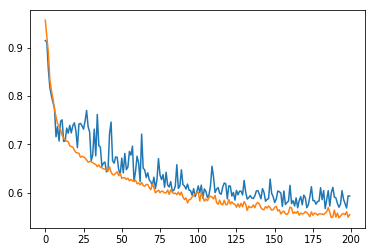

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_test_list)
plt.plot(loss_train_list)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
y_predict = reg.predict(x_test)
mean_absolute_error(y_test, y_predict)

0.8869702275347158

In [ ]:
two_bond_data = two_bond('2JHC')

C:\Users\citrix\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [ ]:
two_bond_data.head()

In [ ]:
### SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_predict_svr = clf.predict(x_test)

In [ ]:
mean_absolute_error(y_test, y_predict_svr)

0.743632160560312

In [ ]:
## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimator = 25, n_jobs = 2, random_state =50, max_features = "auto", min_samples_leaf = 10)
model_RF.fit(x_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'n_estimator'

In [ ]:
sample_leaf_options = [1,5,10,20,30,40,50]
for leaf_size in sample_leaf_options :
    model = RandomForestRegressor(n_estimators = 500, n_jobs = -1,random_state = 50,
                                  max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(x_train,y_train)
    print (mean_absolute_error(y_test,model.predict(x_test)))

0.3235764285517116
0.36162992081637935
0.40175813763869417
0.47193894025841693
0.5170463277972646
0.5452977733510627
0.5740157154150526


In [ ]:
model = RandomForestRegressor(n_estimators = 200, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 1)
model.fit(x_train,y_train)
print (mean_absolute_error(y_test,model.predict(x_test)))

0.324038462930305


In [ ]:
mean_absolute_error(y_train,model.predict(x_train))

0.123739929295862

In [ ]:
len(x_train_)

3750

In [ ]:
#RF without DPs

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 1000, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 1)
model_rf.fit(x_train_,y_train_)
print (mean_absolute_error(y_test_, model_rf.predict(x_test_)))

0.306621685323506


In [ ]:
print (mean_absolute_error(y_train_, model_rf.predict(x_train_)))

0.11724046572863314


In [ ]:
#3JHC

In [ ]:
engineered_3jhc = three_bond('3JHC')

C:\Users\citrix\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
C:\Users\citrix\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\Users\citrix\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
engineered_3jhc['atom2'].value_counts()

C    2851
O    1234
N     913
F       2
Name: atom2, dtype: int64

In [ ]:
class ThreeBondDataPreProcess:
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    def PreProcess(enginee):
        cate_features_train = pd.get_dummies(enginee, columns=['atom1'], prefix = ['atom1'])
        cate_features_train = pd.get_dummies(cate_features_train, columns=['atom2'], prefix = ['atom2'])
        train, test = train_test_split(cate_features_train, test_size=0.25)
        
        for index, rows in (train.iterrows()):
            x_train.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                            rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N'],
                            rows['atom2_O'],rows['atom2_F'],rows['DP_X'],rows['DP_Y'],rows['DP_Z']])
        
        for index, rows in (train.iterrows()):
            y_train.append(rows['coupling'])
        
        for index, rows in (test.iterrows()):
            x_test.append([rows['length1'],rows['length2'],rows['length_shared'],rows['angle'],rows['hybrid1'],rows['hybrid2'],
                           rows['terminal_hybrid'],rows['atom1_C'],rows['atom1_N'],rows['atom1_O'],rows['atom2_C'],rows['atom2_N'],
                           rows['atom2_O'],rows['atom2_F'],rows['DP_X'],rows['DP_Y'],rows['DP_Z']])   

        for index, rows in (test.iterrows()):
            y_test.append(rows['coupling']) 
    
        return x_train, y_train, x_test, y_test
    def RandomForestReg(x_train, y_train, x_test, y_test):
        model = RandomForestRegressor(n_estimators = 200, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 1)
        model.fit(x_train,y_train)
        return (mean_absolute_error(y_test, model.predict(x_test)))

In [ ]:
cate_features_train_3jhc = pd.get_dummies(engineered_3jhc, columns=['atom1'], prefix = ['atom1'])
cate_features_train_3jhc = pd.get_dummies(cate_features_train_3jhc, columns=['atom2'], prefix = ['atom2'])
cate_features_train_3jhc.head()

,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,DP_X,DP_Y,DP_Z,coupling,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N,atom2_O
0,1.093317,1.155009,3.162537,1.310467,4,2,1,3.8266,0.000,-0.0001,0.880802,1,0,0,1,0,0
1,1.093319,1.155009,3.162662,-0.783857,4,2,1,3.8266,0.000,-0.0001,0.880957,1,0,0,1,0,0
2,1.093306,1.155009,3.162564,-2.878264,4,2,1,3.8266,0.000,-0.0001,0.880871,1,0,0,1,0,0
3,1.094009,1.369356,2.627629,0.883494,4,3,3,0.1916,-3.615,0.3468,-0.052074,1,0,0,1,0,0
4,1.089656,1.369356,3.318123,-1.238283,4,3,3,0.1916,-3.615,0.3468,1.611320,1,0,0,1,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(cate_features_train_3jhc, test_size=0.25)

In [ ]:
train.head()

,length1,length2,length_shared,angle,hybrid1,hybrid2,terminal_hybrid,DP_X,DP_Y,DP_Z,coupling,atom1_C,atom1_N,atom1_O,atom2_C,atom2_N,atom2_O
2208,1.099041,1.454750,2.656799,2.272123,4,4,3,-4.4740,1.9055,0.3153,1.153890,1,0,0,1,0,0
3537,1.005780,1.319130,2.450772,1.699041,3,2,2,1.0260,2.1191,0.5053,-0.249045,0,1,0,0,1,0
4048,1.098871,1.277902,2.945648,0.085994,4,3,2,-0.3388,-1.8637,-0.6000,1.260550,1,0,0,1,0,0
4660,1.005580,1.335691,3.193965,-1.169294,3,3,2,0.5463,-1.2442,0.6327,3.662130,0,1,0,1,0,0
4571,1.094616,1.337245,2.734746,2.525560,4,3,2,0.0002,-0.7892,0.0001,0.794659,1,0,0,1,0,0


In [ ]:
x_train_3jhc, y_train_3jhc, x_test_3jhc, y_test_3jhc = ThreeBondDataPreProcess.PreProcess(engineered_3jhc)

In [ ]:
result = ThreeBondDataPreProcess.RandomForestReg(x_train_3jhc, y_train_3jhc, x_test_3jhc, y_test_3jhc)

ValueError: setting an array element with a sequence.

In [ ]:
x_train_3jhc

[[1.0990414928812213,
  1.454749615260869,
  2.656798508844341,
  2.272123406047181,
  4.0,
  4.0,
  3.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  -4.474,
  1.9055,
  0.3153],
 [1.0057798973734615,
  1.3191296179112746,
  2.4507716651157163,
  1.69904086527376,
  3.0,
  2.0,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.026,
  2.1191,
  0.5053],
 [1.0988706462531703,
  1.2779021468860343,
  2.945647728313104,
  0.08599442046109264,
  4.0,
  3.0,
  2.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  -0.3388,
  -1.8637,
  -0.6],
 [1.0055804720544892,
  1.3356910967339117,
  3.193964539173329,
  -1.1692943344091224,
  3.0,
  3.0,
  2.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.5463,
  -1.2442,
  0.6327],
 [1.094615882885746,
  1.3372447475045608,
  2.734745668844592,
  2.5255600937164453,
  4.0,
  3.0,
  2.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0002,
  -0.7892,
  0.0001],
 [1.0952839034206652,
  1.4565465581812926,
  2.9786466857583855,
  0.13597027743481166,
  4.0,
  4.0,
  3.0,
  1.0,
  0.0,
  0.0,
